# Multi-view reconstruction and Meshing

## 1. Prerequisites

### 1.1 Load data

<IPython.core.display.Javascript object>


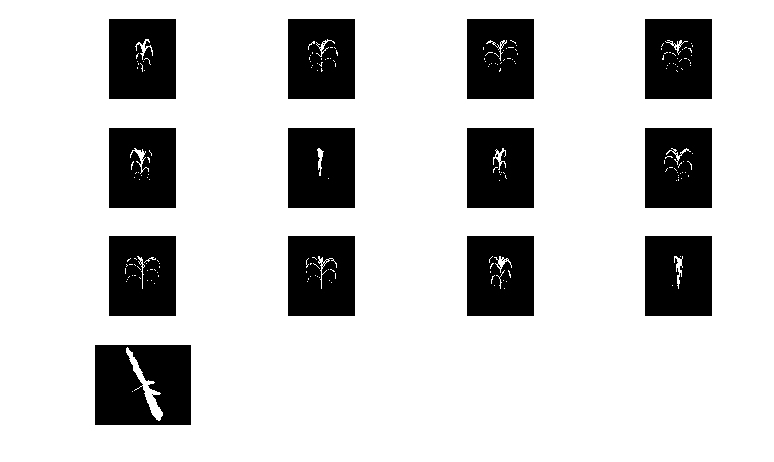

In [17]:
%matplotlib notebook

import cv2
import openalea.phenomenal.data as data 
import openalea.phenomenal.display as display

plant_number = 11
bin_images = data.bin_images(plant_number=plant_number)
calibrations = data.calibrations(plant_number=plant_number)

display.show_images(bin_images['side'].values() + bin_images['top'].values())

## 2. Multi-view reconstruction

### 2.1 Associate images and projection function

In [31]:
def routine_select_ref_angle(bin_side_images):

    max_len = 0
    max_angle = None
    
    for angle in bin_side_images:
    
        x_pos, y_pos, x_len, y_len = cv2.boundingRect(cv2.findNonZero(bin_side_images[angle]))

        if x_len > max_len:
            max_len = x_len
            max_angle = angle

    return max_angle

In [35]:
from openalea.phenomenal.object import ImageView

refs_angle_list = [routine_select_ref_angle(bin_images["side"])]

image_views = list()
for id_camera in bin_images:
    for angle in bin_images[id_camera]:
        projection = calibrations[id_camera].get_projection(angle)
    
        image_ref = None
        if id_camera == "side" and angle in refs_angle_list:
            image_ref = bin_images[id_camera][angle]
        
        inclusive = False
        if id_camera == "top":
            inclusive = True
            
        image_views.append(ImageView(bin_images[id_camera][angle], 
                                     projection, 
                                     inclusive=inclusive, 
                                     image_ref=image_ref))

### 2.2 Do multi-view reconstruction

In [47]:
from openalea.phenomenal.object import VoxelGrid
from openalea.phenomenal.multi_view_reconstruction import reconstruction_3d

voxels_size = 2
error_tolerance = 1

voxel_grid = reconstruction_3d(image_views, 
                               voxels_size=voxels_size,
                               error_tolerance=error_tolerance)

### 2.4 Save / Load voxel grid

In [48]:
filename = "plant_{}_size_{}.npz".format(plant_number, voxels_size)

voxel_grid.write(filename)
voxel_grid = VoxelGrid.read(filename)

### 2.5 Viewing

In [39]:
from openalea.phenomenal.display.notebook import show_voxel_grid

show_voxel_grid(vg)

A Jupyter Widget

# 3.Meshing

In [24]:
from openalea.phenomenal.mesh import meshing
from openalea.phenomenal.display.notebook import show_mesh

In [25]:
image_3d = vg.to_image_3d()

vertices, faces = meshing(image_3d,
                          reduction=1,
                          smoothing_iteration=10,
                          verbose=True)

print("Number of vertices : {nb_vertices}".format(nb_vertices=len(vertices)))
print("Number of faces : {nb_faces}".format(nb_faces=len(faces)))

show_mesh(vertices, faces)

Marching cubes : 
	Iso value :1.0

	There are 17184 points.
	There are 34818 polygons.
Smoothing : 
	Feature angle :120.0
	Number of iteration :10
	Pass band : 0.01

Number of vertices : 17184
Number of faces : 34818


A Jupyter Widget